# Chemical profile diagram
In this notebook we demonstrate how to create a chemical profile diagram with `tulips`. This diagram is useful when you are interested in the composition of a stellar model. It will not only show which isotopes are present, but also how the composition differs from the center to the edge of the stellar object. Similar to the other diagrams, `tulips` represents the stellar object as a circle, divided in rings. To show the interior composition, `tulips` uses nested pie-charts. For every ring, it shows the mass fraction of each isotope present in that layer, by using different colors. Let's try and create an example chemical profile diagram. 

### Load an example model
At first, we have to load the history output of a MESA model. Here we load the `history.data` file of a $11  M_{\odot}$ stellar model into object `m11`:

In [2]:
# Interactive matplotlib plotting for jupyter notebook
%matplotlib notebook

# If you use jupyter lab
# %matplotlib inline

import matplotlib.pyplot as plt
import mesaPlot as mp
import tulips

# Specify directory of MESA model
SINGLE_M11_DIR = "../../../../old_tulips_project/tulips/tulips/MESA_DIR_EXAMPLE/LOGS/"

m11 = mp.MESA()
m11.loadHistory(f=SINGLE_M11_DIR)

<div class="alert alert-warning">

Warning
    
As explained in the [Getting Started](getting_started.ipynb) page, MESA produces two types of output: `history.data` and `profile.data` files. When making a property diagram, you have to be sure that both of these types of files are stored in the model.

</div>

In [3]:
# # Use LaTeX in the plots
col_w = 3.5    # Figure width in inches, columnswidth
text_w = 7.25 # Full page figure width
plt.rcParams.update({
    'figure.figsize': (col_w, col_w/(4/3.)),     # 4:3 aspect ratio
    'font.size' : 11,                   # Set font size to 11pt
    'axes.labelsize': 11,               # -> axis labels
    'legend.fontsize': 9,              # -> legends
    'font.family': 'lmodern',
    'text.usetex': True,
    'text.latex.preamble': (            # LaTeX preamble
        r'\usepackage{lmodern}'
        # ... more packages if needed
    ),
    'figure.dpi': 200,
})

import warnings
warnings.filterwarnings("ignore")

### Plotting the chemical profile 
We produce a chemical profile diagram of our stellar model with the `tulips.chemical_profile` function. As arguments it requires our `mesaPlot` object `m11`, and a time index. Here, we plot a model halfway its lifetime by setting `time_ind=1000`. Have a look at the [Getting Started](getting_started.ipynb) page for more information about how to use `time_ind`.  

../../../../old_tulips_project/tulips/tulips/MESA_DIR_EXAMPLE/LOGS///profile102.data


(<Figure size 1100x800 with 2 Axes>, <AxesSubplot:>)

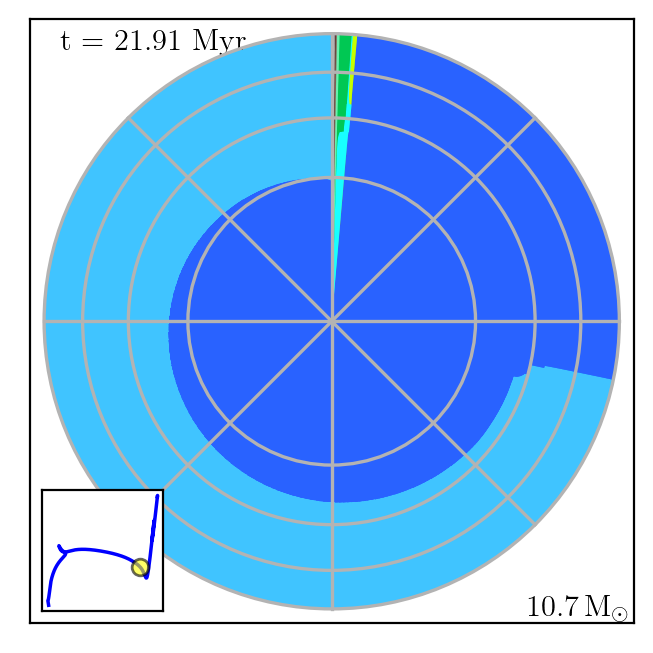

In [4]:
tulips.chemical_profile(m11,time_ind=1000)

This diagram shows us a stellar model, represented by a circle that is divided in nested pie-charts. The colors indicate which kind of element is present in a certain region in its interior. 

### Reading the diagram
The radius of the cirle is proportional to the square root of the enclosed mass. Accordingly, the area covered by a color is proportional to the total mass of that element. The grey circles help to visualize this, since they indicate the regions that account for 25, 50, 75 and 100% of the total mass. You can hide these circles with `show_ring_annotations = False`. In this example, we see a star whose outer layers consists for almost 75% out of hydrogen and 25% of helium. However, the inner layers contain almost only helium. There is also a small part with heavier elements over all layers. 

<div class="alert alert-info">

Note
    
It is possible to change what is represented by the radius with the `raxis` keyword. However, this is not recommended since it will make the diagram less intuitive and difficult to interpret.  Moreover, `tulips` automatically shows the square root of that quantity, which will make it hard to read the diagram. 

</div>

### Adjusting the diagram
By default, `tulips` creates pie-charts in a counterclockwise direction, beginning from an angle of 90 degrees from the horizontal axis. It is possible to change these settings, by modifying the `counterclock` and `startangle` variables. 
It starts with the element that has the lowest mass number (hydrogen), and continues with heavier ones, ending with e.g. iron. 

It is possible to scale the diagram. This can be useful if you are, for example, only interested in the composition in the core. You can do this by changing the `scale` variable, which gives the value to scale the circle to. The radius will be $\sqrt{\textrm{star_mass}}/ \sqrt{\textrm{scale}}$. 

### Creating an animation 



<div class="alert alert-warning">

Warning
    
The amount of profiles stores in the `profile.data` file can be small. When making an animation, you have to be sure that enough profile output has been saved to show a meaningful time evolution of the property of interest. 
    
</div>

In [ ]:
# tulips.chemical_profile(m,time_ind=1000)